### Libraries and Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import *

In [3]:
def initial_trend(series: List, uppercase_m: int) -> float:
    return sum([
        float(series[i+uppercase_m] - series[i]) / uppercase_m
        for i in range(uppercase_m)
    ]) / uppercase_m


def initial_seasonality(series: List, uppercase_m: int) -> List:
    initial_season = []
    n_seasons = int(len(series)/uppercase_m)

    season_averages = [sum(
        series[uppercase_m * i:uppercase_m * i + uppercase_m]
    ) / uppercase_m for i in range(n_seasons)]

    initial_season.extend([
        sum([series[uppercase_m*j+i]-season_averages[j]
             for j in range(n_seasons)]) / n_seasons
        for i in range(uppercase_m)
    ])

    return initial_season

def winters_es(series: List,
               uppercase_m: int,
               alpha: float=0.2,
               beta: float=0.2,
               gamma: float=0.15,
               future_steps: int=1) -> List:
    
    i_l = [series[0]]
    i_t = [initial_trend(series, uppercase_m)]
    i_s = initial_seasonality(series, uppercase_m)

    forecasts = []
    for t in range(len(series) + future_steps):

        if t >= len(series):
            m = t - len(series) + 1
            forecasts.append(
                (i_l[-1] + m * i_t[-1]) + i_s[t % uppercase_m]
            )

        else:
            l_t = alpha * (series[t] - i_s[t % uppercase_m]) + (1 - alpha) * (i_l[-1] + i_t[-1])

            i_t[-1] = beta * (l_t - i_l[-1]) + (1 - beta) * i_t[-1]
            i_l[-1] = l_t

            i_s[t % uppercase_m] = gamma * (series[t] - l_t) + (1 - gamma) * i_s[t % uppercase_m]

            forecasts.append(
                (i_l[-1] + i_t[-1]) + i_s[t % uppercase_m]
            )

    return forecasts


In [22]:
data = pd.read_csv('data_test/shampoo.csv')["Sales"]
data = data.values.tolist()

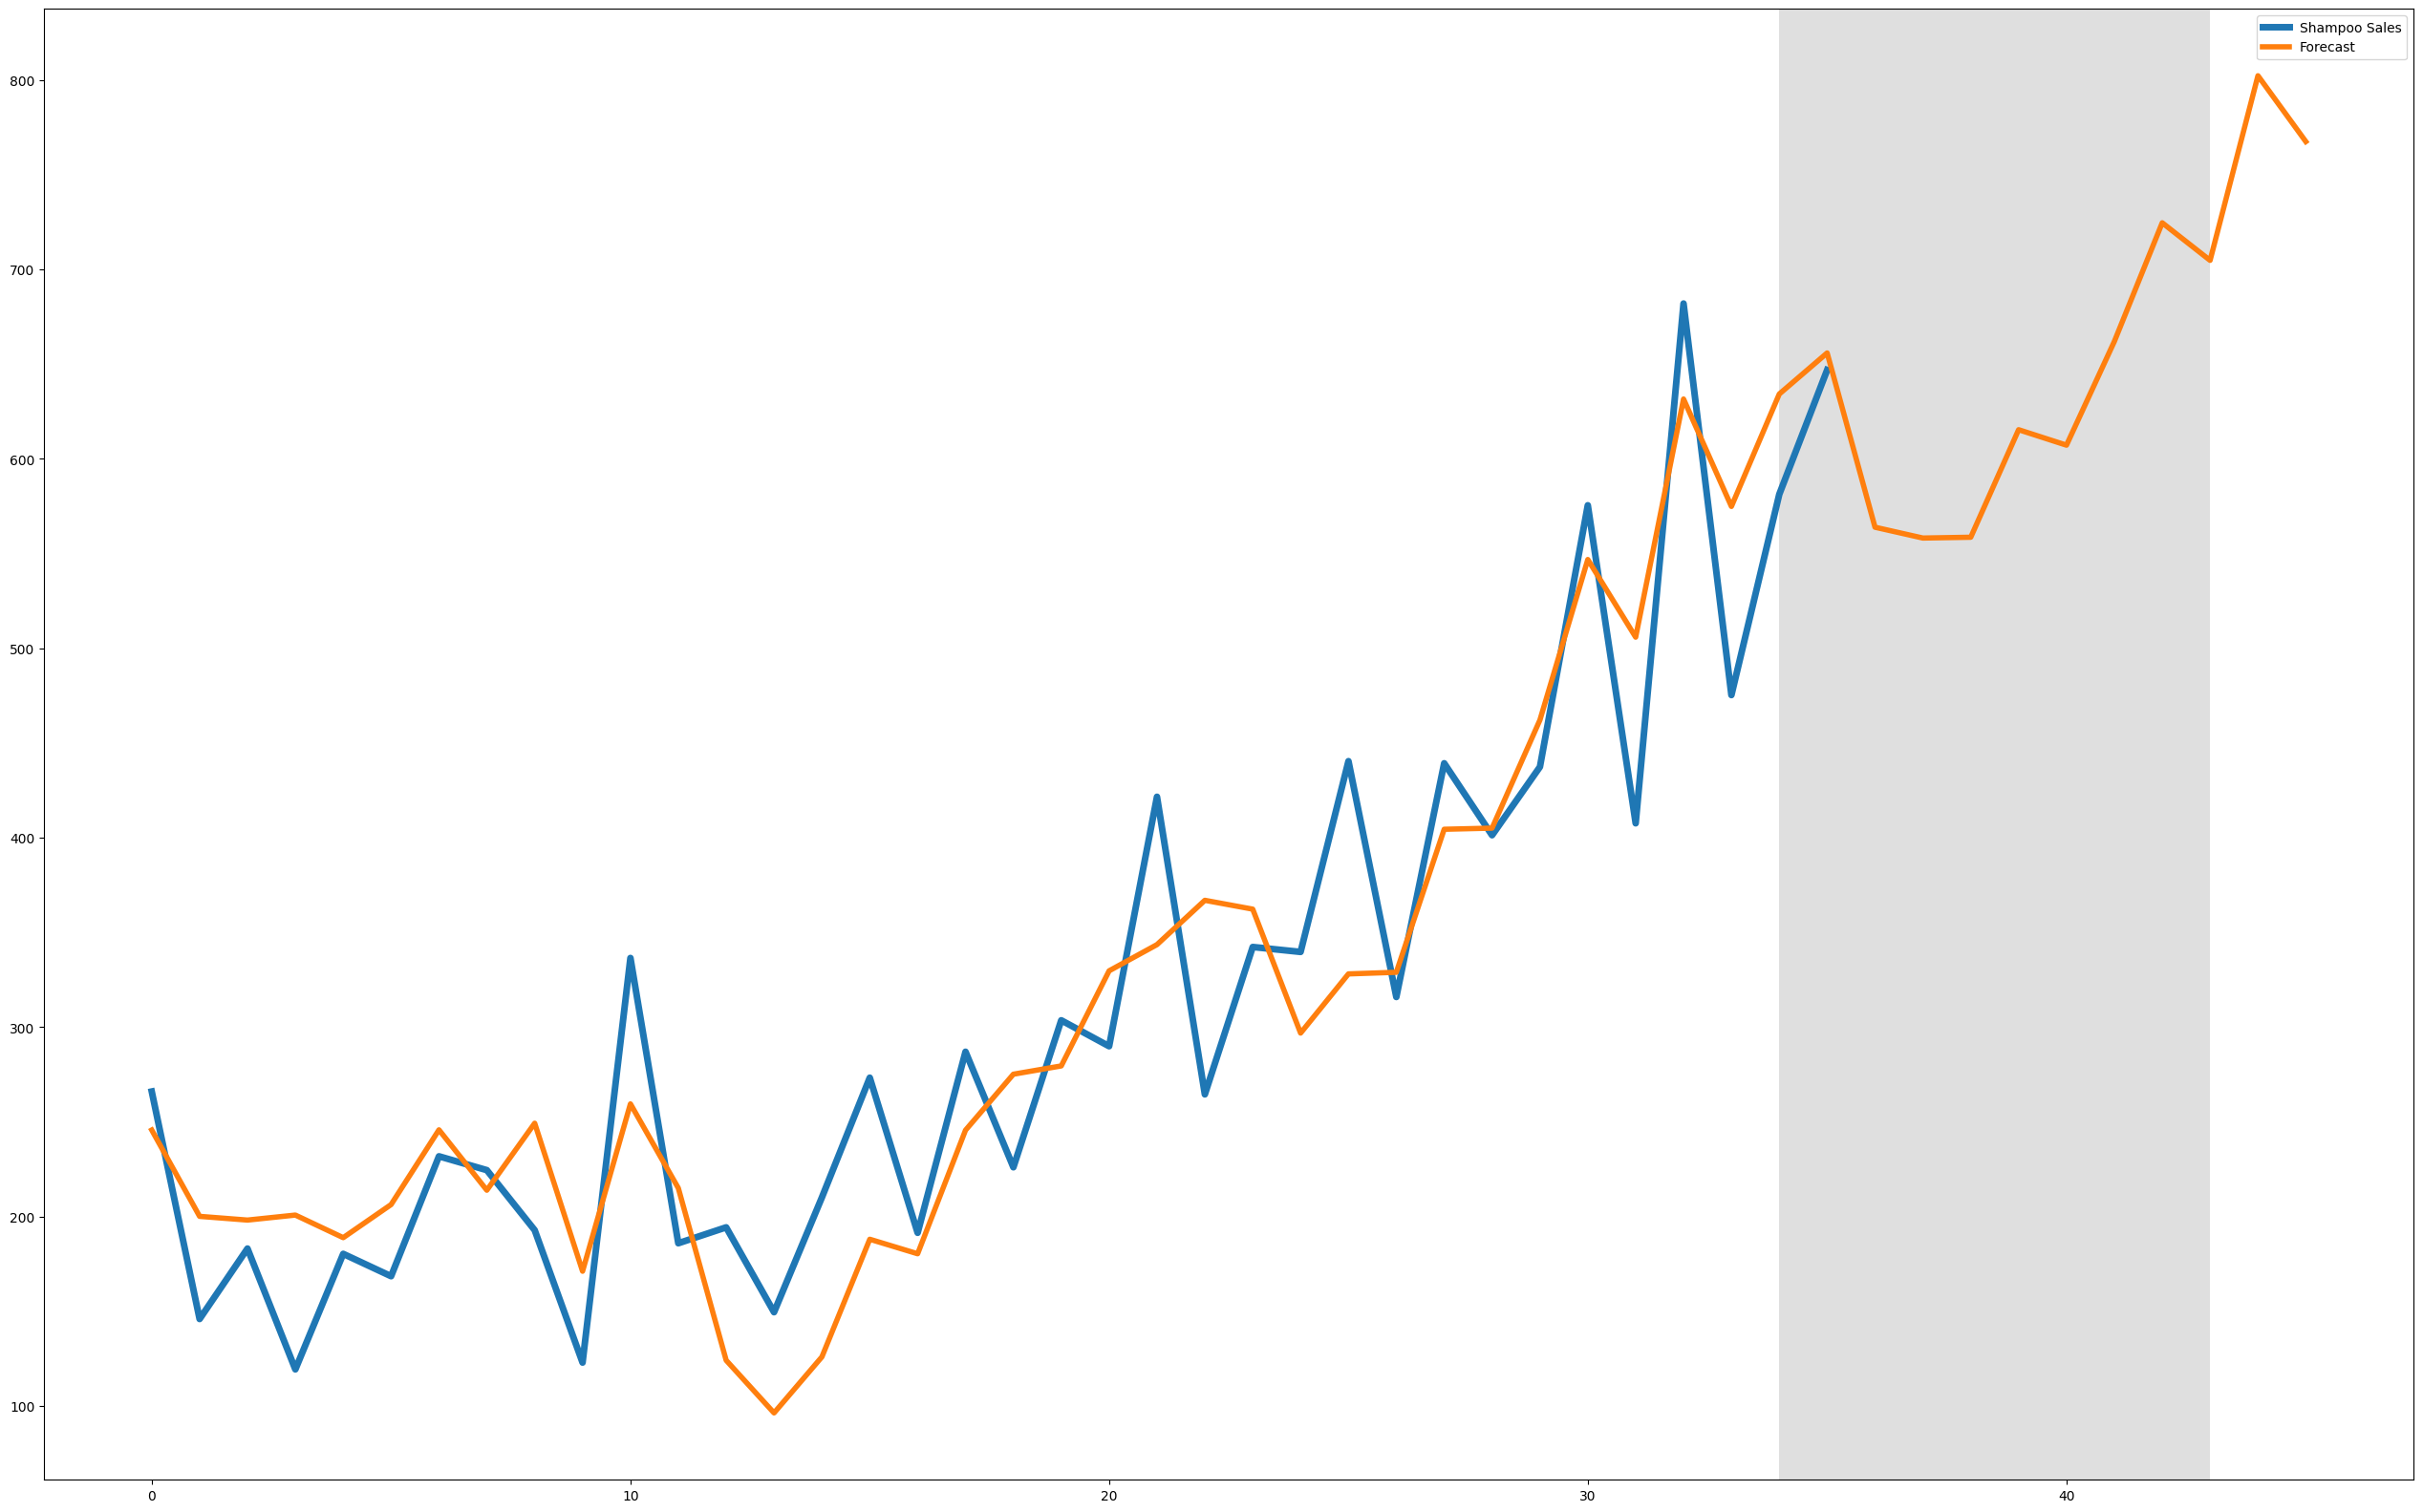

In [23]:
plt.figure(
    figsize=(32, 20)
)

k = 10
last_months = list(range(34, 34 + k))

forecast = winters_es(data, 12, future_steps=10)
plt.plot(data, linewidth=5, label='Shampoo Sales')
plt.plot(forecast, linewidth=4, label='Forecast')
plt.axvspan(*(last_months[0], last_months[-1]), 
            facecolor='grey', 
            alpha=0.25)
plt.legend()
plt.show()